# Notebook projectweek 
## Analysing the market for a startup company.
### i've found four datasets that i want to use to analyse the market and locate where potential clients are located for a startup company

In [47]:
import numpy as np
import pandas as pd

In [48]:
distance = pd.read_csv("afstand_tot.csv", sep=';') #<---- seperator is a semicolon

In [49]:
print(distance.isnull().sum())

distance

ID                         0
WijkenEnBuurten            0
AfstandTotZonnebank_109    0
dtype: int64


,ID,WijkenEnBuurten,AfstandTotZonnebank_109
0,0,NL00,4.1
1,1,GM1680,10.8
2,2,WK168000,13.6
3,3,BU16800000,13.6
4,4,BU16800009,12.7
...,...,...,...
17336,17336,BU01935150,1.2
17337,17337,BU01935160,2.0
17338,17338,WK019352,4.2
17339,17339,BU01935200,5.1


### The column 'Wijken en Buurten' are variables representing certain areas in the Netherlands. I want to know wich areas these are so i'll find a dataset where i can get this info from.

In [50]:
code = pd.read_csv("kerncijfers_wijken.csv", sep=';')

In [51]:
code

,ID,WijkenEnBuurten,Gemeentenaam_1,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,MeestVoorkomendePostcode_113,Dekkingspercentage_114
0,0,NL00,Nederland,NL00,17475415,8686536,8788879,2711731,2139221,4347005,4819923,3457535,.,.
1,1,GM1680,Aa en Hunze,GM1680,25399,12709,12690,3383,2611,4463,8060,6882,.,.
2,2,WK168000,Aa en Hunze,WK168000,3595,1750,1845,515,370,625,1130,940,.,.
3,3,BU16800000,Aa en Hunze,BU16800000,3440,1670,1770,500,355,610,1065,895,9468,1
4,4,BU16800009,Aa en Hunze,BU16800009,160,80,80,15,10,15,60,45,9468,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676,17676,BU01935150,Zwolle,BU01935150,3075,1550,1525,590,360,725,970,420,8014,1
17677,17677,BU01935160,Zwolle,BU01935160,130,65,60,25,15,15,60,5,8015,2
17678,17678,WK019352,Zwolle,WK019352,905,455,450,140,95,135,295,235,.,.
17679,17679,BU01935200,Zwolle,BU01935200,395,195,200,80,35,90,115,65,8015,1


### Now i want to merge the two df using the area codes as a primary key

In [52]:
code_areas = code[['WijkenEnBuurten','Gemeentenaam_1']]

In [53]:
code_areas

,WijkenEnBuurten,Gemeentenaam_1
0,NL00,Nederland
1,GM1680,Aa en Hunze
2,WK168000,Aa en Hunze
3,BU16800000,Aa en Hunze
4,BU16800009,Aa en Hunze
...,...,...
17676,BU01935150,Zwolle
17677,BU01935160,Zwolle
17678,WK019352,Zwolle
17679,BU01935200,Zwolle


In [54]:
distance_complete = distance.merge(code_areas, on='WijkenEnBuurten',how= 'outer')

print(distance_complete.isnull().sum())
distance_complete.head(60)

ID                         816
WijkenEnBuurten              0
AfstandTotZonnebank_109    816
Gemeentenaam_1             476
dtype: int64


,ID,WijkenEnBuurten,AfstandTotZonnebank_109,Gemeentenaam_1
0,0.0,NL00,4.1,Nederland
1,1.0,GM1680,10.8,Aa en Hunze
2,2.0,WK168000,13.6,Aa en Hunze
3,3.0,BU16800000,13.6,Aa en Hunze
4,4.0,BU16800009,12.7,Aa en Hunze
5,5.0,WK168001,14.0,Aa en Hunze
6,6.0,BU16800100,14.0,Aa en Hunze
7,7.0,BU16800109,14.3,Aa en Hunze
8,8.0,WK168002,12.1,Aa en Hunze
9,9.0,BU16800200,11.9,Aa en Hunze


#### distance_complete is the df i can use to see the distance to the nearest tanning salon from any part in the Netherlands 

### i might want to filter on a bigger scale so i drop some of the information. 


#### Lets see what we need to do with the null values. We are not going to use all of the dataset.

### Lets check out the other DF for the project

In [55]:
population = pd.read_csv("bevolking_en_huishouden_per_postcode.csv", sep=';')

In [56]:
population

,ID,PostcodesOp1Januari,TotaalMannenEnVrouwen_1,k_0Tot5Jaar_2,k_5Tot10Jaar_3,k_10Tot15Jaar_4,k_15Tot20Jaar_5,k_20Tot25Jaar_6,k_25Tot30Jaar_7,k_30Tot35Jaar_8,...,TotaalAllochtonen_64,WesterseAllochtoon_65,NietWesterseAllochtoon_66,TotaalParticuliereHuishoudens_67,Eenpersoonshuishoudens_68,MeerpersoonshuishoudensZonderKinderen_69,MeerpersoonshuishoudensMetKinderen_70,GemiddeldeHuishoudensgrootte_71,Gemeentecode_72,Gemeentenaam_73
0,0,1011,9000,345,225,245,295,910,905,715,...,3365,2260,1100,6035,4075,1115,845,1.49,363,Amsterdam
1,1,1012,8025,235,140,90,210,1085,1490,1070,...,3530,2210,1325,5610,4035,1145,430,1.37,363,Amsterdam
2,2,1013,21180,1130,745,685,790,2130,2210,2125,...,9340,4235,5110,13060,8250,2390,2425,1.60,363,Amsterdam
3,3,1014,215,0,0,10,5,10,25,25,...,95,40,55,125,100,20,10,1.41,363,Amsterdam
4,4,1015,14600,600,445,380,390,1235,1510,1375,...,5030,3470,1565,9850,6620,1880,1350,1.48,363,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,4606,81896,5,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,2.00,1896,Zwartewaterland
4607,4607,81901,5,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,1.00,1901,Bodegraven-Reeuwijk
4608,4608,81903,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.00,1903,Eijsden-Margraten
4609,4609,81904,665,20,20,20,25,30,25,40,...,70,60,10,410,230,90,80,1.63,1904,Stichtse Vecht


### I want to work with the data from nearby city's, i will filter this info accordingly.

In [57]:
pop_clean = population.loc[(population['PostcodesOp1Januari'] >2000) & (population['PostcodesOp1Januari'] <2500)]

pop_clean

,ID,PostcodesOp1Januari,TotaalMannenEnVrouwen_1,k_0Tot5Jaar_2,k_5Tot10Jaar_3,k_10Tot15Jaar_4,k_15Tot20Jaar_5,k_20Tot25Jaar_6,k_25Tot30Jaar_7,k_30Tot35Jaar_8,...,TotaalAllochtonen_64,WesterseAllochtoon_65,NietWesterseAllochtoon_66,TotaalParticuliereHuishoudens_67,Eenpersoonshuishoudens_68,MeerpersoonshuishoudensZonderKinderen_69,MeerpersoonshuishoudensMetKinderen_70,GemiddeldeHuishoudensgrootte_71,Gemeentecode_72,Gemeentenaam_73
455,455,2011,12360,530,360,305,365,1080,1525,1330,...,3070,2100,970,7510,4500,1865,1150,1.60,392,Haarlem
456,456,2012,12195,660,715,750,635,605,780,790,...,2495,1685,815,5900,2800,1485,1615,2.00,392,Haarlem
457,457,2013,8115,510,415,400,380,515,675,780,...,1645,1120,525,4040,1850,1035,1155,1.96,392,Haarlem
458,458,2014,7190,440,490,475,435,325,335,405,...,960,695,270,3235,1170,850,1215,2.22,392,Haarlem
459,459,2015,5375,325,380,315,290,350,155,225,...,840,635,205,2540,1130,625,785,2.08,392,Haarlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,626,2493,6925,970,700,445,340,260,475,890,...,2605,590,2010,2365,335,570,1465,2.92,518,'s-Gravenhage
627,627,2495,170,5,15,5,5,5,5,5,...,30,20,10,65,20,25,20,2.24,518,'s-Gravenhage
628,628,2496,9485,855,995,775,550,400,520,645,...,3590,1215,2375,3520,755,865,1890,2.70,518,'s-Gravenhage
629,629,2497,10120,845,915,805,645,470,505,760,...,3855,1120,2730,3790,840,925,2020,2.64,518,'s-Gravenhage


In [58]:
pop_clean['Gemeentenaam_73'].unique()

array(['                        Haarlem',
       '                      Zandvoort',
       '                    Bloemendaal',
       ' Haarlemmerliede en Spaarnwoude',
       '                         Velsen',
       '                      Heemstede',
       '                 Haarlemmermeer',
       '               Kaag en Braassem',
       '                          Lisse',
       '                      Teylingen',
       '                       Hillegom',
       '                Noordwijkerhout',
       '                      Noordwijk',
       '                        Katwijk',
       '                      Wassenaar',
       '                    Voorschoten',
       '          Leidschendam-Voorburg',
       '                       Rijswijk',
       '                       Westland',
       '                         Leiden',
       '                     Oegstgeest',
       '                     Leiderdorp',
       '                    Zoeterwoude',
       '                      Rijn

## Cleaning the Dataset of household income

In [59]:
income = pd.read_csv("85065NED_TypedDataSet_08022022_123026.csv", sep=';')

print(income.dtypes)

income

Geslacht                                object
Persoonskenmerken                       object
RegioS                                  object
Perioden                                 int64
Personen_1                             float64
PersonenMetPersoonlijkInkomen_2        float64
AandeelPersonen_3                        int64
GemiddeldGestandaardiseerdInkomen_4    float64
MediaanGestandaardiseerdInkomen_5      float64
GemiddeldPersoonlijkInkomen_6          float64
MediaanPersoonlijkInkomen_7            float64
dtype: object


,Geslacht,Persoonskenmerken,RegioS,Perioden,Personen_1,PersonenMetPersoonlijkInkomen_2,AandeelPersonen_3,GemiddeldGestandaardiseerdInkomen_4,MediaanGestandaardiseerdInkomen_5,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
0,TotaalManVrouw,TotaalPers,GM1680,2019,24.8,20.7,100,34.0,31.1,32.6,26.3
1,TotaalManVrouw,TotaalPers,GM1680,2020,24.9,20.7,100,35.3,32.5,33.9,27.2
2,TotaalManVrouw,TotaalPers,GM0358,2019,31.2,25.0,100,40.4,33.8,37.9,29.2
3,TotaalManVrouw,TotaalPers,GM0358,2020,31.4,25.2,100,41.5,35.0,38.7,29.8
4,TotaalManVrouw,TotaalPers,GM0197,2019,26.5,21.8,100,31.8,28.7,29.0,24.3
...,...,...,...,...,...,...,...,...,...,...,...
10555,Vrouw,65_jaar_en_ouder,GM1896,2020,1.9,1.9,18,NaN,23.6,NaN,14.6
10556,Vrouw,65_jaar_en_ouder,GM0642,2019,5.4,5.3,24,28.4,23.5,19.2,16.0
10557,Vrouw,65_jaar_en_ouder,GM0642,2020,5.4,5.4,24,28.4,24.2,20.0,16.6
10558,Vrouw,65_jaar_en_ouder,GM0193,2019,10.3,10.3,16,28.2,24.4,20.1,16.7


In [60]:
income.isnull().sum()


Geslacht                                  0
Persoonskenmerken                         0
RegioS                                    0
Perioden                                  0
Personen_1                                0
PersonenMetPersoonlijkInkomen_2           0
AandeelPersonen_3                         0
GemiddeldGestandaardiseerdInkomen_4    1183
MediaanGestandaardiseerdInkomen_5       216
GemiddeldPersoonlijkInkomen_6          1284
MediaanPersoonlijkInkomen_7             236
dtype: int64

# im starting over because the previous DF did not combine well.

## population DF

### i want to know the population of te target group in the surrounding area. I will focus for the most part on women between 20 to 45.




### i've done bulk of the cleaning in excel. Replacing the keys with the names and made selections of the data i want to use. I will give more details in the readme file.

In [61]:
bevolking = pd.read_csv("2020.csv", sep=';')

In [62]:
bevolking

,ID,Geslacht,LeeftijdNaam,BurgerlijkeStaat,RegioS,RegioNaam,Perioden,BevolkingOp1Januari_1
0,16487414,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2020,563
1,16487415,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2021,579
2,16490032,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2020,74
3,16490033,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2021,55
4,16495574,Mannen,0 jaar,Ongehuwd,GM0392,Haarlem,2020,980
...,...,...,...,...,...,...,...,...
34235,48908149,Vrouwen,105 jaar of ouder,Gescheiden,GM0629,Wassenaar,2021,0
34236,48910086,Vrouwen,105 jaar of ouder,Gescheiden,GM0473,Zandvoort,2020,0
34237,48910087,Vrouwen,105 jaar of ouder,Gescheiden,GM0473,Zandvoort,2021,0
34238,48910630,Vrouwen,105 jaar of ouder,Gescheiden,GM0638,Zoeterwoude,2020,0


## Income DF

### Also this DF i cleaned in excel and will be talked about in the readme.

In [63]:
inkomen = pd.read_csv("df_inkomen_regio.csv", sep=';')

inkomen['Persoonskenmerken'].unique()

inkomen

,Geslacht,Persoonskenmerken,RegioS,RegioNaam,Perioden,Personen_1,aantal_persoonlijk_inkomen,AandeelPersonen_3,Gem_standaardiseerd_besteedbaar_inkomen,Mediaan_standaardiseerd_besteedbaar_inkomen,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
0,Man,15_tot_25_jaar,GM1680,Aa en Hunze,2019,1400,1200,11,36100,33400,11400,6700
1,Man,15_tot_25_jaar,GM1680,Aa en Hunze,2020,1400,1200,11,0,35400,0,6700
2,Man,15_tot_25_jaar,GM0358,Aalsmeer,2019,1900,1700,12,43100,37200,12300,7400
3,Man,15_tot_25_jaar,GM0358,Aalsmeer,2020,1900,1700,12,0,38500,0,7700
4,Man,15_tot_25_jaar,GM0197,Aalten,2019,1600,1500,12,35900,33000,13500,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
5627,Vrouw,65_jaar_en_ouder,GM1896,Zwartewaterland,2020,1900,1900,18,0,23600,0,14600
5628,Vrouw,65_jaar_en_ouder,GM0642,Zwijndrecht,2019,5400,5300,24,28400,23500,19200,16000
5629,Vrouw,65_jaar_en_ouder,GM0642,Zwijndrecht,2020,5400,5400,24,28400,24200,20000,16600
5630,Vrouw,65_jaar_en_ouder,GM0193,Zwolle,2019,10300,10300,16,28200,24400,20100,16700


## As im working with these df's i want to know what people are earning in certain age groups (income DF) and i want to know how many people that are (population DF). This requires me to make an extra DF where i put the ages from the population DF in bins like those in the income DF. 

## before i can bin the ages i need to remove the string from the age category. 

In [64]:
import re

In [65]:
bevolking['LeeftijdNum'] = bevolking['LeeftijdNaam'].str.replace("[^0-9]", "");

bevolking

<ipython-input-65-b60ec739c0c5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bevolking['LeeftijdNum'] = bevolking['LeeftijdNaam'].str.replace("[^0-9]", "");


,ID,Geslacht,LeeftijdNaam,BurgerlijkeStaat,RegioS,RegioNaam,Perioden,BevolkingOp1Januari_1,LeeftijdNum
0,16487414,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2020,563,0
1,16487415,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2021,579,0
2,16490032,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2020,74,0
3,16490033,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2021,55,0
4,16495574,Mannen,0 jaar,Ongehuwd,GM0392,Haarlem,2020,980,0
...,...,...,...,...,...,...,...,...,...
34235,48908149,Vrouwen,105 jaar of ouder,Gescheiden,GM0629,Wassenaar,2021,0,105
34236,48910086,Vrouwen,105 jaar of ouder,Gescheiden,GM0473,Zandvoort,2020,0,105
34237,48910087,Vrouwen,105 jaar of ouder,Gescheiden,GM0473,Zandvoort,2021,0,105
34238,48910630,Vrouwen,105 jaar of ouder,Gescheiden,GM0638,Zoeterwoude,2020,0,105


In [66]:
bins = [-1,14,24,44,64,90]
labels = ['0_tot_15','15_tot_25','25_tot_45','45_tot_65','65_en_ouder']

In [67]:
pop_bins = bevolking 

#### I have to convert LeeftijdNum column to a integer for the bin function to work

In [68]:
pop_bins['LeeftijdNum'] = pop_bins['LeeftijdNum'].astype(int)

print(pop_bins.dtypes)

ID                        int64
Geslacht                 object
LeeftijdNaam             object
BurgerlijkeStaat         object
RegioS                   object
RegioNaam                object
Perioden                  int64
BevolkingOp1Januari_1     int64
LeeftijdNum               int32
dtype: object


In [69]:
pop_bins['LeeftijdBin'] = pd.cut(pop_bins['LeeftijdNum'],bins,labels=labels) 

pop_bins

,ID,Geslacht,LeeftijdNaam,BurgerlijkeStaat,RegioS,RegioNaam,Perioden,BevolkingOp1Januari_1,LeeftijdNum,LeeftijdBin
0,16487414,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2020,563,0,0_tot_15
1,16487415,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2021,579,0,0_tot_15
2,16490032,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2020,74,0,0_tot_15
3,16490033,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2021,55,0,0_tot_15
4,16495574,Mannen,0 jaar,Ongehuwd,GM0392,Haarlem,2020,980,0,0_tot_15
...,...,...,...,...,...,...,...,...,...,...
34235,48908149,Vrouwen,105 jaar of ouder,Gescheiden,GM0629,Wassenaar,2021,0,105,NaN
34236,48910086,Vrouwen,105 jaar of ouder,Gescheiden,GM0473,Zandvoort,2020,0,105,NaN
34237,48910087,Vrouwen,105 jaar of ouder,Gescheiden,GM0473,Zandvoort,2021,0,105,NaN
34238,48910630,Vrouwen,105 jaar of ouder,Gescheiden,GM0638,Zoeterwoude,2020,0,105,NaN


#### I see a lot of NaN values appear for the higher numbers, i decide to drop them because i wont need people above age 90 for my research.

In [70]:
pop_bins = pop_bins.dropna()
pop_bins.isna().sum()

ID                       0
Geslacht                 0
LeeftijdNaam             0
BurgerlijkeStaat         0
RegioS                   0
RegioNaam                0
Perioden                 0
BevolkingOp1Januari_1    0
LeeftijdNum              0
LeeftijdBin              0
dtype: int64

In [71]:
pop_bins

,ID,Geslacht,LeeftijdNaam,BurgerlijkeStaat,RegioS,RegioNaam,Perioden,BevolkingOp1Januari_1,LeeftijdNum,LeeftijdBin
0,16487414,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2020,563,0,0_tot_15
1,16487415,Mannen,0 jaar,Ongehuwd,GM0484,Alphen aan den Rijn,2021,579,0,0_tot_15
2,16490032,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2020,74,0,0_tot_15
3,16490033,Mannen,0 jaar,Ongehuwd,GM0377,Bloemendaal,2021,55,0,0_tot_15
4,16495574,Mannen,0 jaar,Ongehuwd,GM0392,Haarlem,2020,980,0,0_tot_15
...,...,...,...,...,...,...,...,...,...,...
31675,46492789,Vrouwen,90 jaar,Gescheiden,GM0629,Wassenaar,2021,2,90,65_en_ouder
31676,46494726,Vrouwen,90 jaar,Gescheiden,GM0473,Zandvoort,2020,2,90,65_en_ouder
31677,46494727,Vrouwen,90 jaar,Gescheiden,GM0473,Zandvoort,2021,5,90,65_en_ouder
31678,46495270,Vrouwen,90 jaar,Gescheiden,GM0638,Zoeterwoude,2020,0,90,65_en_ouder


#### As i want to concat with my other df i decide to drop the values from year 2021 and only keep data from 2020, also i drop the ID column as it is redundant

In [72]:
index_names = pop_bins[(pop_bins['Perioden'] != 2020)].index
pop_bins.drop(index_names, inplace = True)

pop_bins = pop_bins.drop(['ID'], axis=1)

pop_bins.shape

C:\Users\Tom\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(14560, 9)

#### The final step is to groupby() on 2 columns. I want the DF grouped by the bins AND Gemeente level. 

In [73]:
# pop_bins_group = pop_bins.groupby(['RegioNaam', 'LeeftijdBin'])

# pop_bins_group

#need to clean the DF's some more so i can concat.

### Lets see if we can fit the data to eachother

In [74]:
pop_bins
income

,Geslacht,Persoonskenmerken,RegioS,Perioden,Personen_1,PersonenMetPersoonlijkInkomen_2,AandeelPersonen_3,GemiddeldGestandaardiseerdInkomen_4,MediaanGestandaardiseerdInkomen_5,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
0,TotaalManVrouw,TotaalPers,GM1680,2019,24.8,20.7,100,34.0,31.1,32.6,26.3
1,TotaalManVrouw,TotaalPers,GM1680,2020,24.9,20.7,100,35.3,32.5,33.9,27.2
2,TotaalManVrouw,TotaalPers,GM0358,2019,31.2,25.0,100,40.4,33.8,37.9,29.2
3,TotaalManVrouw,TotaalPers,GM0358,2020,31.4,25.2,100,41.5,35.0,38.7,29.8
4,TotaalManVrouw,TotaalPers,GM0197,2019,26.5,21.8,100,31.8,28.7,29.0,24.3
...,...,...,...,...,...,...,...,...,...,...,...
10555,Vrouw,65_jaar_en_ouder,GM1896,2020,1.9,1.9,18,NaN,23.6,NaN,14.6
10556,Vrouw,65_jaar_en_ouder,GM0642,2019,5.4,5.3,24,28.4,23.5,19.2,16.0
10557,Vrouw,65_jaar_en_ouder,GM0642,2020,5.4,5.4,24,28.4,24.2,20.0,16.6
10558,Vrouw,65_jaar_en_ouder,GM0193,2019,10.3,10.3,16,28.2,24.4,20.1,16.7


### Seems like we need to clean income some more to concat the right way

In [75]:
income= income[income["Geslacht"].str.contains("Totaal")==False]

income= income[income['Persoonskenmerken'].str.contains("Totaal")== False]

index_inc = income[(income['Perioden'] != 2020)].index
income.drop(index_inc, inplace = True)

income

,Geslacht,Persoonskenmerken,RegioS,Perioden,Personen_1,PersonenMetPersoonlijkInkomen_2,AandeelPersonen_3,GemiddeldGestandaardiseerdInkomen_4,MediaanGestandaardiseerdInkomen_5,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
4225,Man,15_tot_25_jaar,GM1680,2020,1.4,1.2,11,NaN,35.4,NaN,6.7
4227,Man,15_tot_25_jaar,GM0358,2020,1.9,1.7,12,NaN,38.5,NaN,7.7
4229,Man,15_tot_25_jaar,GM0197,2020,1.6,1.5,12,NaN,34.2,NaN,9.5
4231,Man,15_tot_25_jaar,GM0059,2020,1.8,1.6,13,NaN,31.9,NaN,9.9
4233,Man,15_tot_25_jaar,GM0482,2020,1.3,1.2,13,NaN,35.9,NaN,11.7
...,...,...,...,...,...,...,...,...,...,...,...
10551,Vrouw,65_jaar_en_ouder,GM0879,2020,2.3,2.3,22,NaN,25.1,NaN,16.0
10553,Vrouw,65_jaar_en_ouder,GM0301,2020,5.5,5.4,23,28.6,26.2,21.4,18.0
10555,Vrouw,65_jaar_en_ouder,GM1896,2020,1.9,1.9,18,NaN,23.6,NaN,14.6
10557,Vrouw,65_jaar_en_ouder,GM0642,2020,5.4,5.4,24,28.4,24.2,20.0,16.6


## i just realise i've been cleaning the wrong file, i will work with inkomen from no on instead of income

In [76]:
index_ink = inkomen[(inkomen['Perioden'] != 2020)].index
inkomen.drop(index_ink, inplace = True)
inkomen


,Geslacht,Persoonskenmerken,RegioS,RegioNaam,Perioden,Personen_1,aantal_persoonlijk_inkomen,AandeelPersonen_3,Gem_standaardiseerd_besteedbaar_inkomen,Mediaan_standaardiseerd_besteedbaar_inkomen,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
1,Man,15_tot_25_jaar,GM1680,Aa en Hunze,2020,1400,1200,11,0,35400,0,6700
3,Man,15_tot_25_jaar,GM0358,Aalsmeer,2020,1900,1700,12,0,38500,0,7700
5,Man,15_tot_25_jaar,GM0197,Aalten,2020,1600,1500,12,0,34200,0,9500
7,Man,15_tot_25_jaar,GM0059,Achtkarspelen,2020,1800,1600,13,0,31900,0,9900
9,Man,15_tot_25_jaar,GM0482,Alblasserdam,2020,1300,1200,13,0,35900,0,11700
...,...,...,...,...,...,...,...,...,...,...,...,...
5623,Vrouw,65_jaar_en_ouder,GM0879,Zundert,2020,2300,2300,22,0,25100,0,16000
5625,Vrouw,65_jaar_en_ouder,GM0301,Zutphen,2020,5500,5400,23,28600,26200,21400,18000
5627,Vrouw,65_jaar_en_ouder,GM1896,Zwartewaterland,2020,1900,1900,18,0,23600,0,14600
5629,Vrouw,65_jaar_en_ouder,GM0642,Zwijndrecht,2020,5400,5400,24,28400,24200,20000,16600


## now i have the same results but only the right figures in the numerical columns.

#### Lets see if we can concat the df on the right way

In [77]:
inkomen['Persoonskenmerken'] = inkomen['Persoonskenmerken'].str.replace("_jaar", "") #remove string for more uniformity

print(inkomen['Persoonskenmerken'].unique())

inkomen

['15_tot_25' '25_tot_45' '45_tot_65' '65_en_ouder']


,Geslacht,Persoonskenmerken,RegioS,RegioNaam,Perioden,Personen_1,aantal_persoonlijk_inkomen,AandeelPersonen_3,Gem_standaardiseerd_besteedbaar_inkomen,Mediaan_standaardiseerd_besteedbaar_inkomen,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
1,Man,15_tot_25,GM1680,Aa en Hunze,2020,1400,1200,11,0,35400,0,6700
3,Man,15_tot_25,GM0358,Aalsmeer,2020,1900,1700,12,0,38500,0,7700
5,Man,15_tot_25,GM0197,Aalten,2020,1600,1500,12,0,34200,0,9500
7,Man,15_tot_25,GM0059,Achtkarspelen,2020,1800,1600,13,0,31900,0,9900
9,Man,15_tot_25,GM0482,Alblasserdam,2020,1300,1200,13,0,35900,0,11700
...,...,...,...,...,...,...,...,...,...,...,...,...
5623,Vrouw,65_en_ouder,GM0879,Zundert,2020,2300,2300,22,0,25100,0,16000
5625,Vrouw,65_en_ouder,GM0301,Zutphen,2020,5500,5400,23,28600,26200,21400,18000
5627,Vrouw,65_en_ouder,GM1896,Zwartewaterland,2020,1900,1900,18,0,23600,0,14600
5629,Vrouw,65_en_ouder,GM0642,Zwijndrecht,2020,5400,5400,24,28400,24200,20000,16600


In [78]:
gebieden = pop_bins['RegioNaam'].unique()
    
inkomen = inkomen[inkomen['RegioNaam'].isin(gebieden)]

inkomen

,Geslacht,Persoonskenmerken,RegioS,RegioNaam,Perioden,Personen_1,aantal_persoonlijk_inkomen,AandeelPersonen_3,Gem_standaardiseerd_besteedbaar_inkomen,Mediaan_standaardiseerd_besteedbaar_inkomen,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
19,Man,15_tot_25,GM0484,Alphen aan den Rijn,2020,6700,6000,12,38800,35400,14200,8800
83,Man,15_tot_25,GM0377,Bloemendaal,2020,1300,1000,12,0,47300,0,3600
223,Man,15_tot_25,GM0392,Haarlem,2020,8200,7300,11,35100,31900,12100,7200
225,Man,15_tot_25,GM0394,Haarlemmermeer,2020,10100,9000,13,41300,36500,12300,7000
241,Man,15_tot_25,GM0397,Heemstede,2020,1300,1100,10,0,42000,0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...
5349,Vrouw,65_en_ouder,GM0579,Oegstgeest,2020,2700,2700,22,38700,33600,27300,21100
5485,Vrouw,65_en_ouder,GM1525,Teylingen,2020,3600,3600,20,33300,27700,21400,17100
5559,Vrouw,65_en_ouder,GM0629,Wassenaar,2020,3500,3500,26,46000,31100,27800,18400
5609,Vrouw,65_en_ouder,GM0473,Zandvoort,2020,2400,2400,27,0,26200,0,18000


In [79]:
pop_bins['Geslacht'].replace('Mannen', 'Man', inplace=True) #make more uniform
pop_bins['Geslacht'].replace('Vrouwen', 'Vrouw', inplace=True) #make more uniform
pop_bins= pop_bins.rename(columns={'LeeftijdBin' : 'Persoonskenmerken'}) #make more uniform
pop_bins= pop_bins.drop(['BurgerlijkeStaat'], axis=1)
pop_bins= pop_bins[pop_bins['Persoonskenmerken'].str.contains("0")== False] #drop 0 to 15 bin

pop_bins['Persoonskenmerken'] = pop_bins['Persoonskenmerken'].astype(str) 

print(pop_bins['Persoonskenmerken'].unique())
pop_bins

['15_tot_25' '25_tot_45' '45_tot_65' '65_en_ouder']


,Geslacht,LeeftijdNaam,RegioS,RegioNaam,Perioden,BevolkingOp1Januari_1,LeeftijdNum,Persoonskenmerken
2400,Man,15 jaar,GM0484,Alphen aan den Rijn,2020,692,15,15_tot_25
2402,Man,15 jaar,GM0377,Bloemendaal,2020,178,15,15_tot_25
2404,Man,15 jaar,GM0392,Haarlem,2020,862,15,15_tot_25
2406,Man,15 jaar,GM0393,Haarlemmerliede en Spaarnwoude,2020,0,15,15_tot_25
2408,Man,15 jaar,GM0394,Haarlemmermeer,2020,1105,15,15_tot_25
...,...,...,...,...,...,...,...,...
31670,Vrouw,90 jaar,GM0579,Oegstgeest,2020,4,90,65_en_ouder
31672,Vrouw,90 jaar,GM1525,Teylingen,2020,4,90,65_en_ouder
31674,Vrouw,90 jaar,GM0629,Wassenaar,2020,4,90,65_en_ouder
31676,Vrouw,90 jaar,GM0473,Zandvoort,2020,2,90,65_en_ouder


In [80]:
pop_bins = pop_bins[['Geslacht','Persoonskenmerken','RegioS', 'RegioNaam', 'Perioden',
       'BevolkingOp1Januari_1', 'LeeftijdNum','LeeftijdNaam']]

pop_bins= pop_bins.reset_index()
inkomen= inkomen.reset_index()

In [81]:
pop_ink_con1 = pop_bins.groupby(['RegioNaam','RegioS','Geslacht','Persoonskenmerken']).agg({'BevolkingOp1Januari_1':sum})

pop_bins.dtypes

# pop_ink_con2 = inkomen.groupby(['RegioNaam','RegioS','Geslacht','Persoonskenmerken'])

index                     int64
Geslacht                 object
Persoonskenmerken        object
RegioS                   object
RegioNaam                object
Perioden                  int64
BevolkingOp1Januari_1     int64
LeeftijdNum               int32
LeeftijdNaam             object
dtype: object

In [82]:
pop_ink_con1

BevolkingOp1Januari_1
RegioNaam           RegioS Geslacht Persoonskenmerken                       
Alphen aan den Rijn GM0484 Man      15_tot_25                           6778
                                    25_tot_45                          13830
                                    45_tot_65                          15824
                                    65_en_ouder                         9834
                           Vrouw    15_tot_25                           6442
...                                                                      ...
Zoeterwoude         GM0638 Man      65_en_ouder                          843
                           Vrouw    15_tot_25                            468
                                    25_tot_45                            928
                                    45_tot_65                           1317
                                    65_en_ouder                          901

[160 rows x 1 columns]

In [83]:
df_clean= pd.merge(pop_bins,inkomen , left_index=True, right_index=True)

df_clean

,index_x,Geslacht_x,Persoonskenmerken_x,RegioS_x,RegioNaam_x,Perioden_x,BevolkingOp1Januari_1,LeeftijdNum,LeeftijdNaam,index_y,...,RegioS_y,RegioNaam_y,Perioden_y,Personen_1,aantal_persoonlijk_inkomen,AandeelPersonen_3,Gem_standaardiseerd_besteedbaar_inkomen,Mediaan_standaardiseerd_besteedbaar_inkomen,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
0,2400,Man,15_tot_25,GM0484,Alphen aan den Rijn,2020,692,15,15 jaar,19,...,GM0484,Alphen aan den Rijn,2020,6700,6000,12,38800,35400,14200,8800
1,2402,Man,15_tot_25,GM0377,Bloemendaal,2020,178,15,15 jaar,83,...,GM0377,Bloemendaal,2020,1300,1000,12,0,47300,0,3600
2,2404,Man,15_tot_25,GM0392,Haarlem,2020,862,15,15 jaar,223,...,GM0392,Haarlem,2020,8200,7300,11,35100,31900,12100,7200
3,2406,Man,15_tot_25,GM0393,Haarlemmerliede en Spaarnwoude,2020,0,15,15 jaar,225,...,GM0394,Haarlemmermeer,2020,10100,9000,13,41300,36500,12300,7000
4,2408,Man,15_tot_25,GM0394,Haarlemmermeer,2020,1105,15,15 jaar,241,...,GM0397,Heemstede,2020,1300,1100,10,0,42000,0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2678,Man,15_tot_25,GM0638,Zoeterwoude,2020,0,16,16 jaar,5349,...,GM0579,Oegstgeest,2020,2700,2700,22,38700,33600,27300,21100
140,2680,Man,15_tot_25,GM0484,Alphen aan den Rijn,2020,0,16,16 jaar,5485,...,GM1525,Teylingen,2020,3600,3600,20,33300,27700,21400,17100
141,2682,Man,15_tot_25,GM0377,Bloemendaal,2020,0,16,16 jaar,5559,...,GM0629,Wassenaar,2020,3500,3500,26,46000,31100,27800,18400
142,2684,Man,15_tot_25,GM0392,Haarlem,2020,0,16,16 jaar,5609,...,GM0473,Zandvoort,2020,2400,2400,27,0,26200,0,18000


In [84]:
df_clean= pd.concat([pop_bins, inkomen], axis=1)

df_clean

,index,Geslacht,Persoonskenmerken,RegioS,RegioNaam,Perioden,BevolkingOp1Januari_1,LeeftijdNum,LeeftijdNaam,index,...,RegioS,RegioNaam,Perioden,Personen_1,aantal_persoonlijk_inkomen,AandeelPersonen_3,Gem_standaardiseerd_besteedbaar_inkomen,Mediaan_standaardiseerd_besteedbaar_inkomen,GemiddeldPersoonlijkInkomen_6,MediaanPersoonlijkInkomen_7
0,2400,Man,15_tot_25,GM0484,Alphen aan den Rijn,2020,692,15,15 jaar,19.0,...,GM0484,Alphen aan den Rijn,2020.0,6700.0,6000.0,12.0,38800.0,35400.0,14200.0,8800.0
1,2402,Man,15_tot_25,GM0377,Bloemendaal,2020,178,15,15 jaar,83.0,...,GM0377,Bloemendaal,2020.0,1300.0,1000.0,12.0,0.0,47300.0,0.0,3600.0
2,2404,Man,15_tot_25,GM0392,Haarlem,2020,862,15,15 jaar,223.0,...,GM0392,Haarlem,2020.0,8200.0,7300.0,11.0,35100.0,31900.0,12100.0,7200.0
3,2406,Man,15_tot_25,GM0393,Haarlemmerliede en Spaarnwoude,2020,0,15,15 jaar,225.0,...,GM0394,Haarlemmermeer,2020.0,10100.0,9000.0,13.0,41300.0,36500.0,12300.0,7000.0
4,2408,Man,15_tot_25,GM0394,Haarlemmermeer,2020,1105,15,15 jaar,241.0,...,GM0397,Heemstede,2020.0,1300.0,1100.0,10.0,0.0,42000.0,0.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12155,31670,Vrouw,65_en_ouder,GM0579,Oegstgeest,2020,4,90,90 jaar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12156,31672,Vrouw,65_en_ouder,GM1525,Teylingen,2020,4,90,90 jaar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12157,31674,Vrouw,65_en_ouder,GM0629,Wassenaar,2020,4,90,90 jaar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12158,31676,Vrouw,65_en_ouder,GM0473,Zandvoort,2020,2,90,90 jaar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# df_group= df_clean.groupby(['RegioNaam','RegioS','Geslacht','Persoonskenmerken'])

## Hypothesis test for our data.

#### My hypotesis to see if Noordwijk is a good area for a starting business will be:
#### H0 : yearly income of potentional customers >= €45.000,-
#### H1 : yearly income of potentional customers < €45.000,-

In [91]:
# before i do the test i want to drop the rows we have a 0 value 
# as that impacts the reliability of our outcome

inkomen_no_0=inkomen

inkomen_no_0=inkomen_no_0[inkomen_no_0.Mediaan_standaardiseerd_besteedbaar_inkomen!=0]

inkomen_no_0['Mediaan_standaardiseerd_besteedbaar_inkomen']



0      35400
1      47300
2      31900
3      36500
4      42000
       ...  
138    26900
139    33600
140    27700
141    31100
142    26200
Name: Mediaan_standaardiseerd_besteedbaar_inkomen, Length: 136, dtype: int64

In [92]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(inkomen_no_0['Mediaan_standaardiseerd_besteedbaar_inkomen'], 45000)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

stat is   -23.108915106774667
pvalue for the two-tailed test is  9.213318290740183e-49


In [ ]:
#P value really low so we reject the H0

### export dataframes to csv so i can plot in tableau

In [ ]:
# inkomen.to_csv(r'inkomen_cleaned.csv')

In [ ]:
# pop_bins.to_csv(r'pop_bins_cleaned.csv')

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
ink_num = inkomen._get_numeric_data()

ink_cat= inkomen.select_dtypes(['object'])

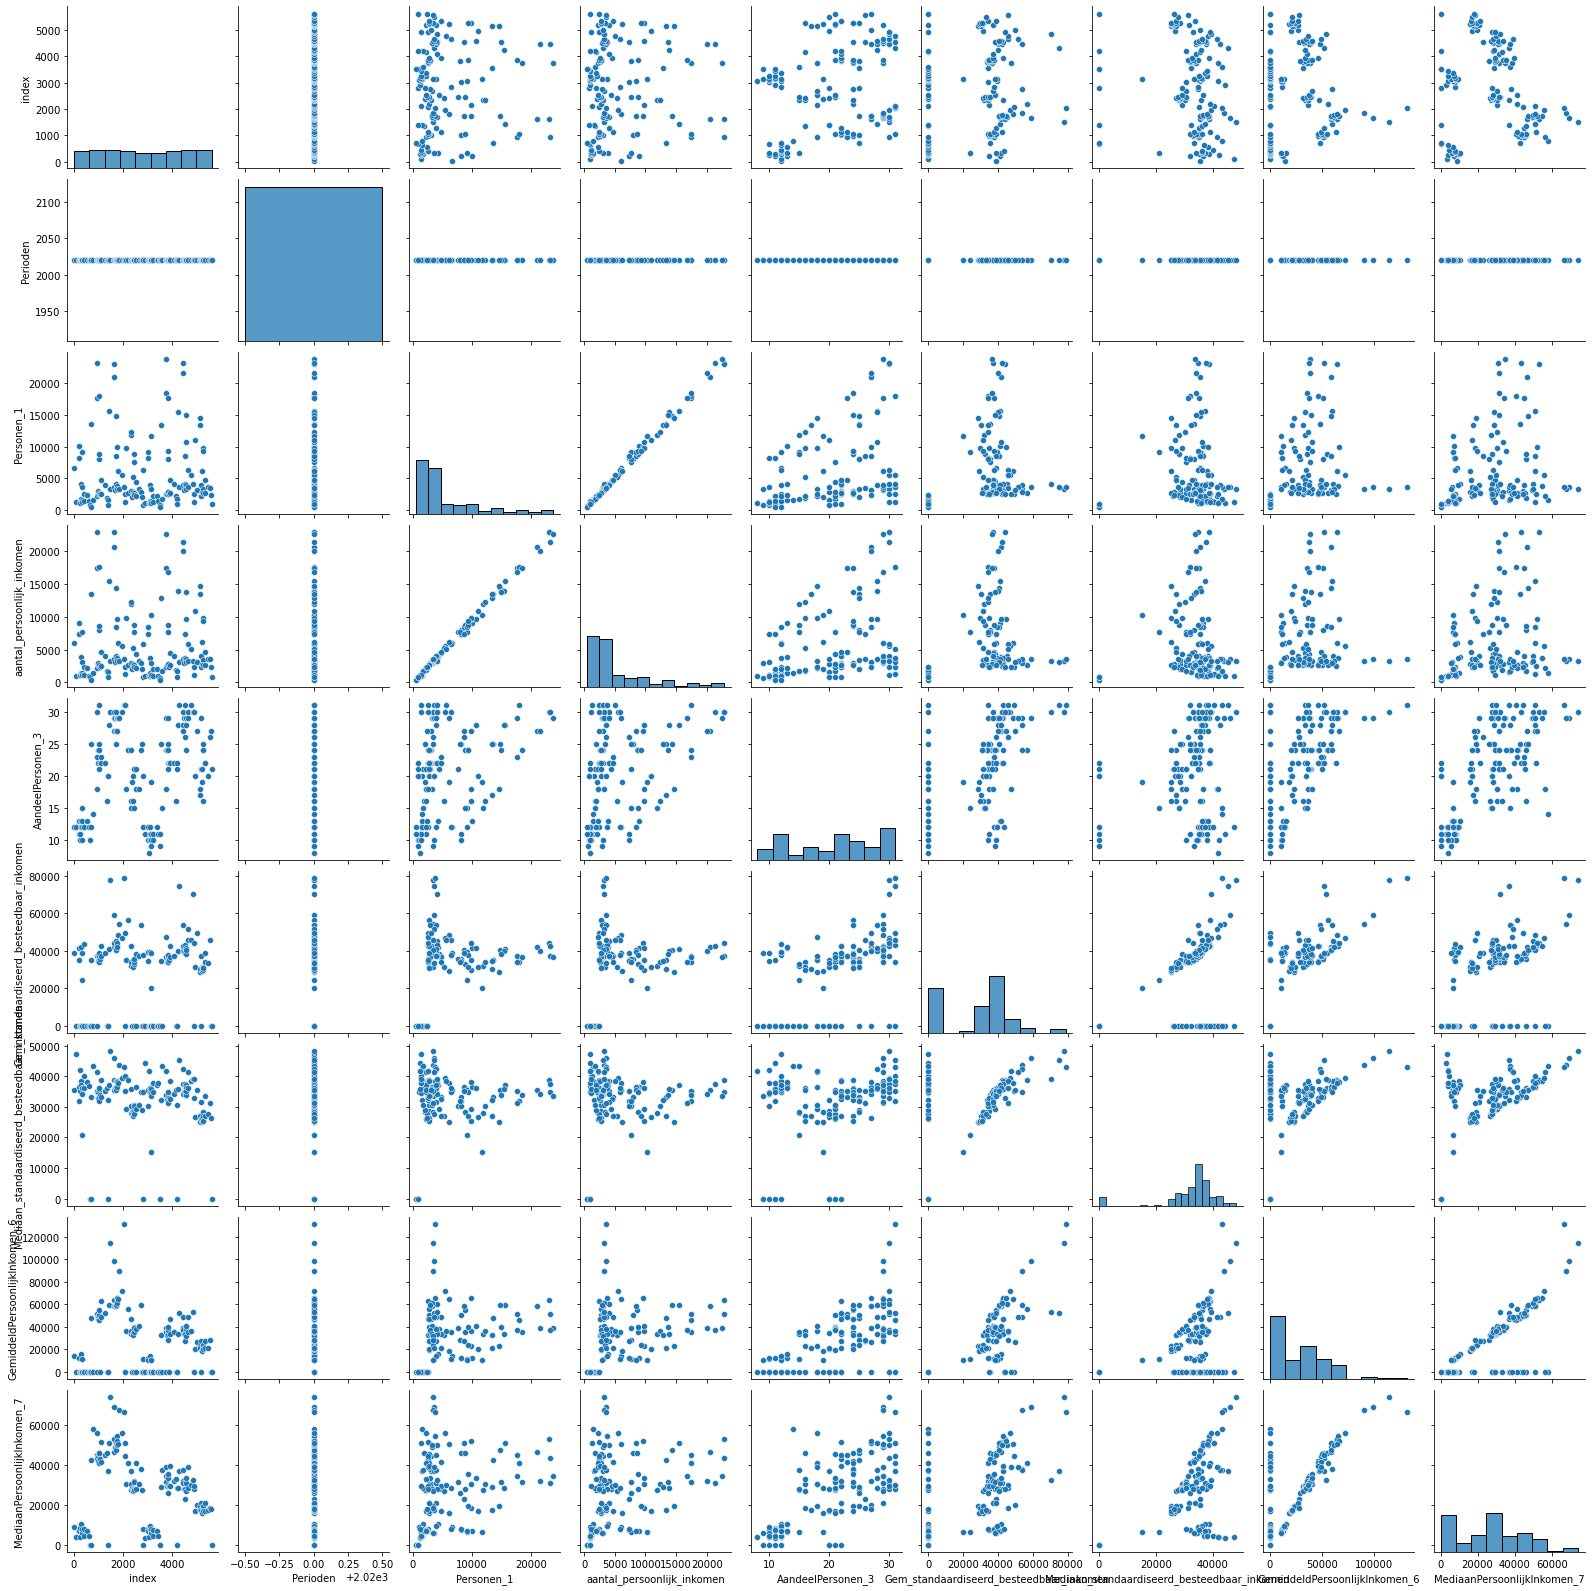

In [45]:
sns.pairplot(ink_num)
plt.show()

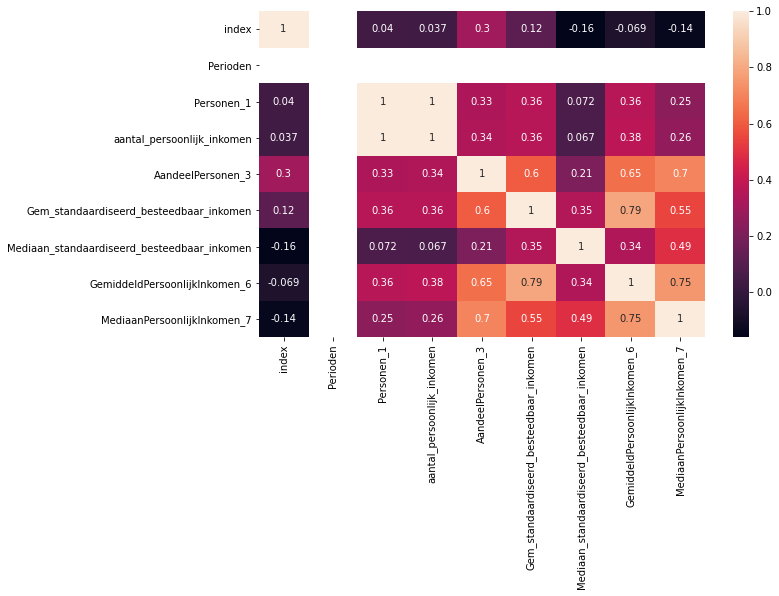

In [46]:
correlations_matrix = ink_num.corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations_matrix, annot=True)
plt.show()